In [32]:
from math import sin, cos, pi
from pylab import *
from lego_robot import *
import numpy as np

In [39]:
# This function takes the old (x, y, heading) pose and the motor ticks
# (ticks_left, ticks_right) and returns the new (x, y, heading).
def filter_step(old_pose, motor_ticks, ticks_to_mm, robot_width,s_d):
    
    x,y,theta = old_pose
    
    left_ticks  = motor_ticks[0]*ticks_to_mm
    right_ticks = motor_ticks[1]*ticks_to_mm
    
    # Find out if there is a turn at all.
    if motor_ticks[0] == motor_ticks[1]:
        # No turn. Just drive straight.

        # --->>> Implement your code to compute x, y, theta here.
      
        x = x + left_ticks*cos(theta)
        y = y + left_ticks*sin(theta)

        return (x, y, theta)

    else:
        # Turn. Compute alpha, R, etc.
               
        # --->>> Implement your code to compute x, y, theta here.
              
        alpha = (right_ticks-left_ticks)/robot_width
        bigR = left_ticks/alpha
        
        x_d,y_d = np.array([s_d*cos(theta),s_d*sin(theta)])
        
        oldx,oldy = np.array([x,y])-np.array([x_d,y_d])
        
        c_x,c_y = np.array([oldx,oldy])-(bigR+(robot_width/2))*np.array([sin(theta),-cos(theta)])
             
        theta_p = (theta+alpha)%(2*pi)
        
        x_p, y_p = np.array([c_x,c_y])+(bigR+(robot_width/2))*np.array([sin(theta_p),-cos(theta_p)])+ np.array([x_d,y_d]) 
        
        return (x_p, y_p, theta_p)

In [40]:
scanner_displacement = 30.0

# Empirically derived conversion from ticks to mm.
ticks_to_mm = 0.349

# Measured width of the robot (wheel gauge), in mm.
robot_width = 150.0

In [41]:
# Measured start position.
pose = (1850.0, 1897.0, 213.0 / 180.0 * pi)

In [42]:
# Read data.
logfile = LegoLogfile()
logfile.read("robot4_motors.txt")

# Loop over all motor tick records generate filtered position list.
filtered = []
for ticks in logfile.motor_ticks:
    pose = filter_step(pose, ticks, ticks_to_mm, robot_width, scanner_displacement)
    filtered.append(pose)

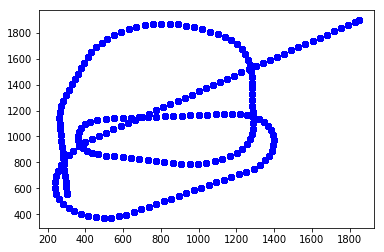

In [43]:
# Draw result.
for pose in filtered:
    plot([p[0] for p in filtered], [p[1] for p in filtered], 'bo')
show()

In [44]:
 # Write all filtered positions to file.
f = open("poses_from_ticks.txt", "w")
for pose in filtered:
    f.write("F %f %f %f\n" % pose)
f.close()